In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from script.helpers import get_data

plt.rcParams["figure.figsize"] = (12,9)

In [2]:
X, y = get_data()

In [4]:
tsne = TSNE(2)
X_tsne = tsne.fit_transform(X)

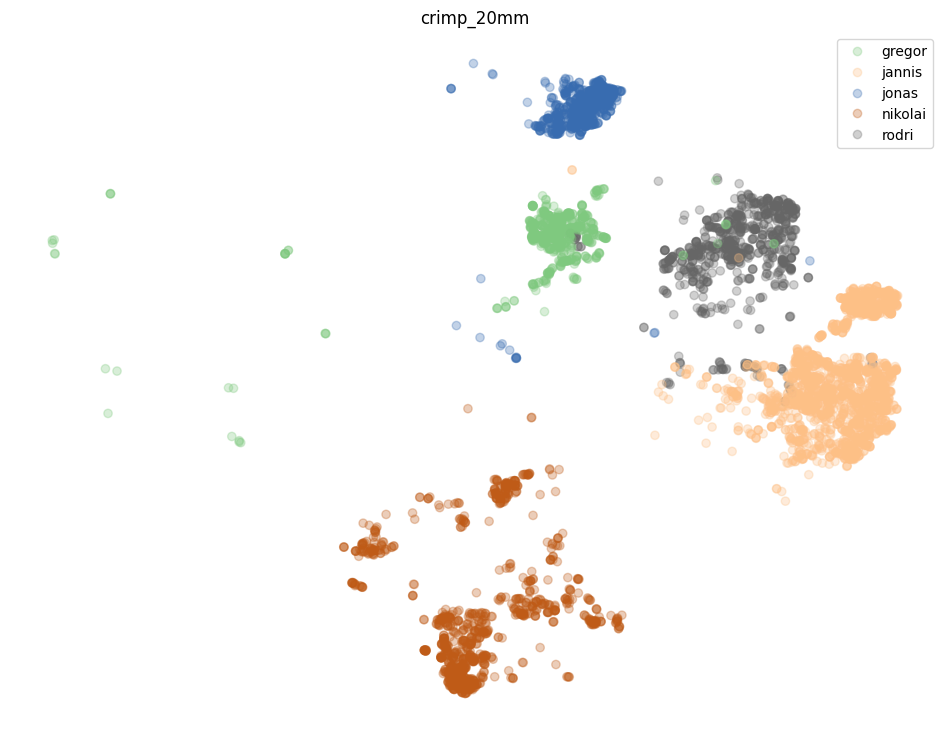

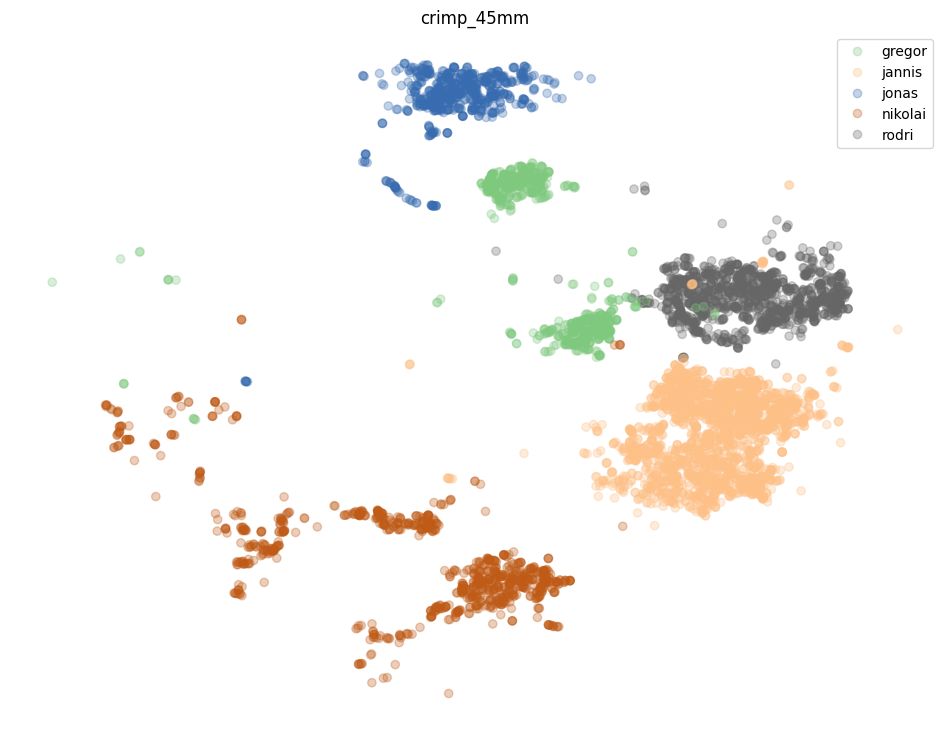

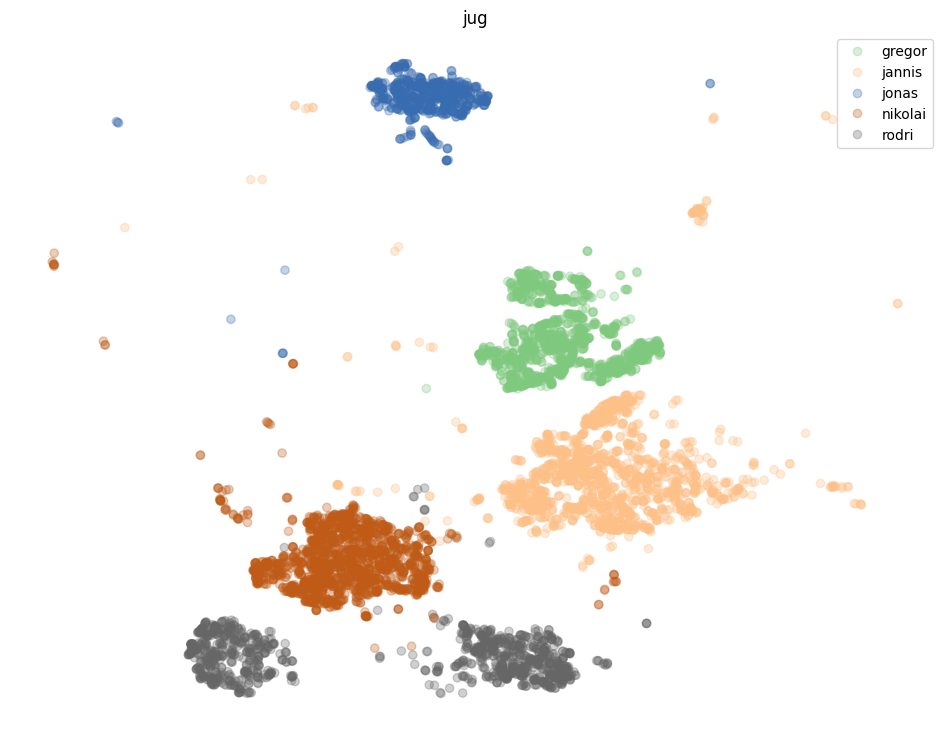

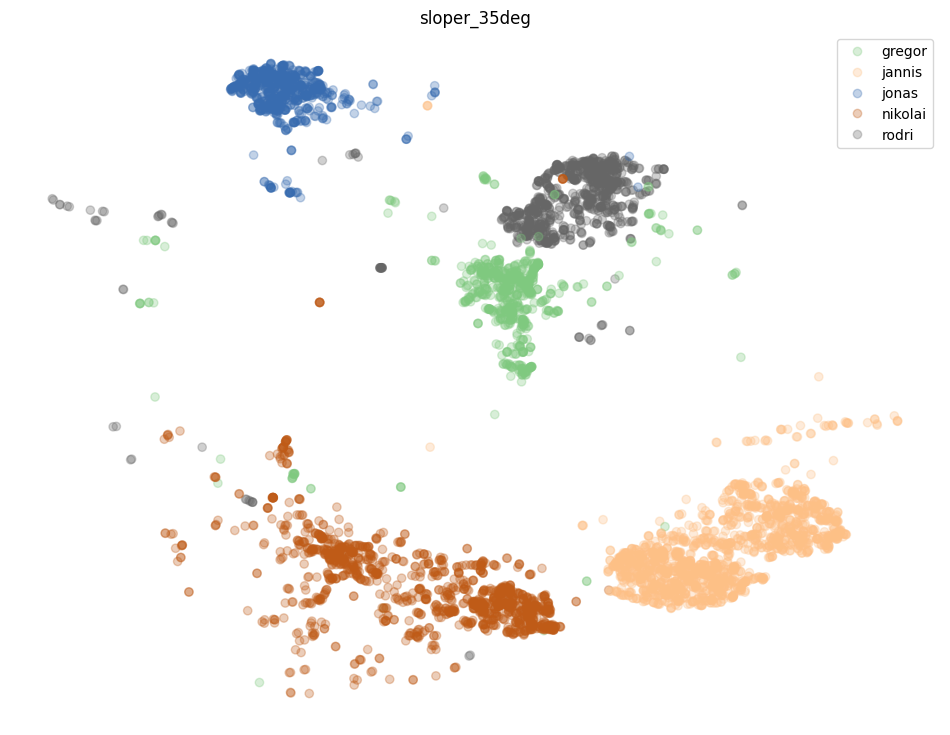

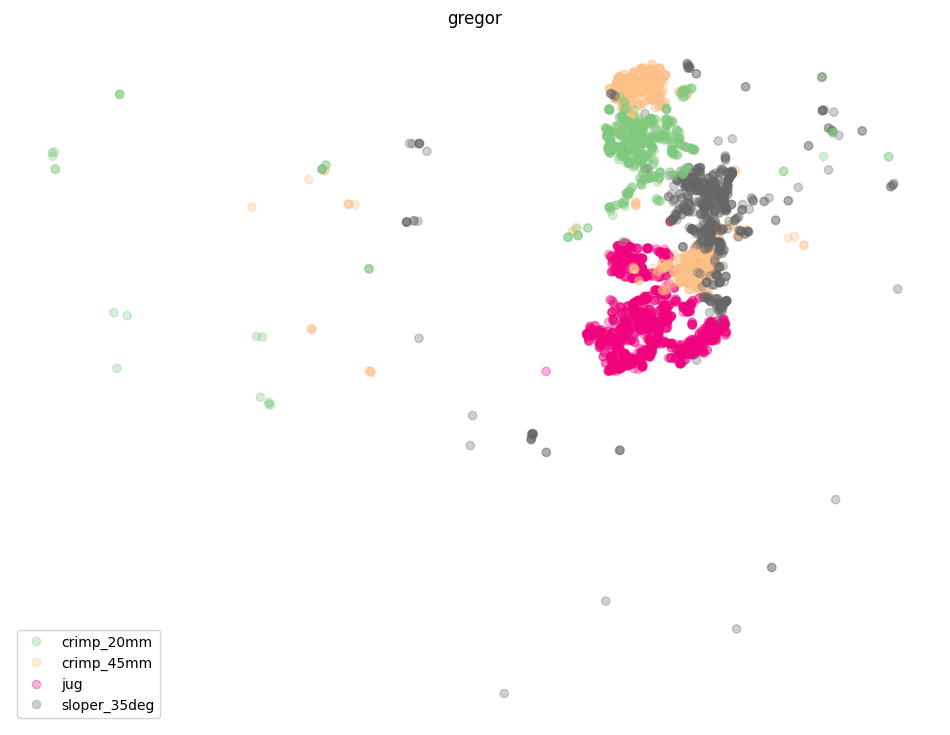

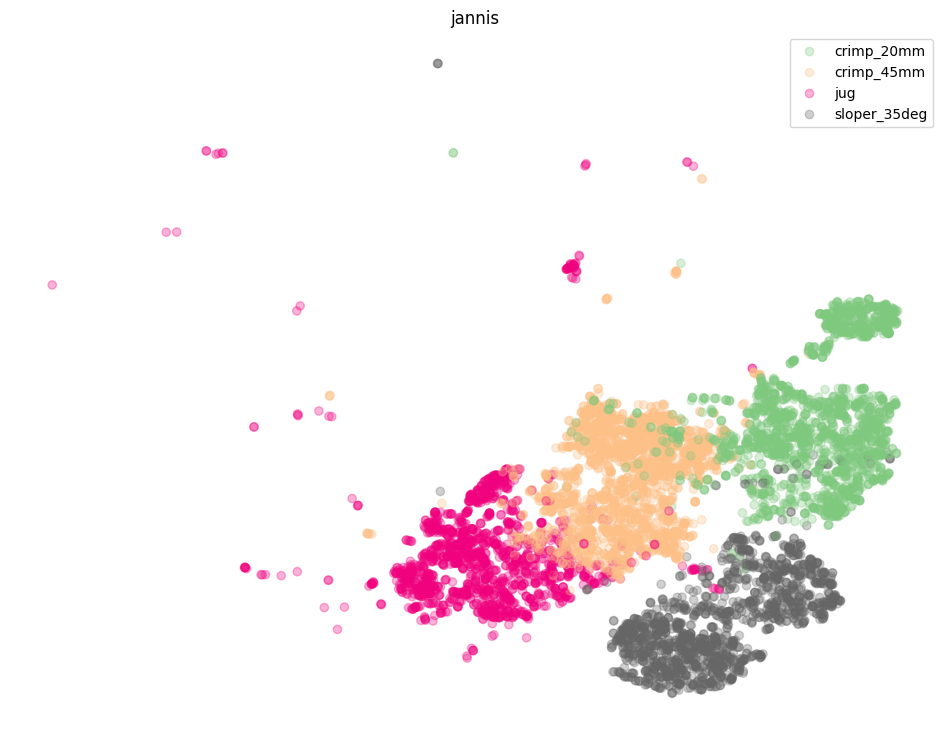

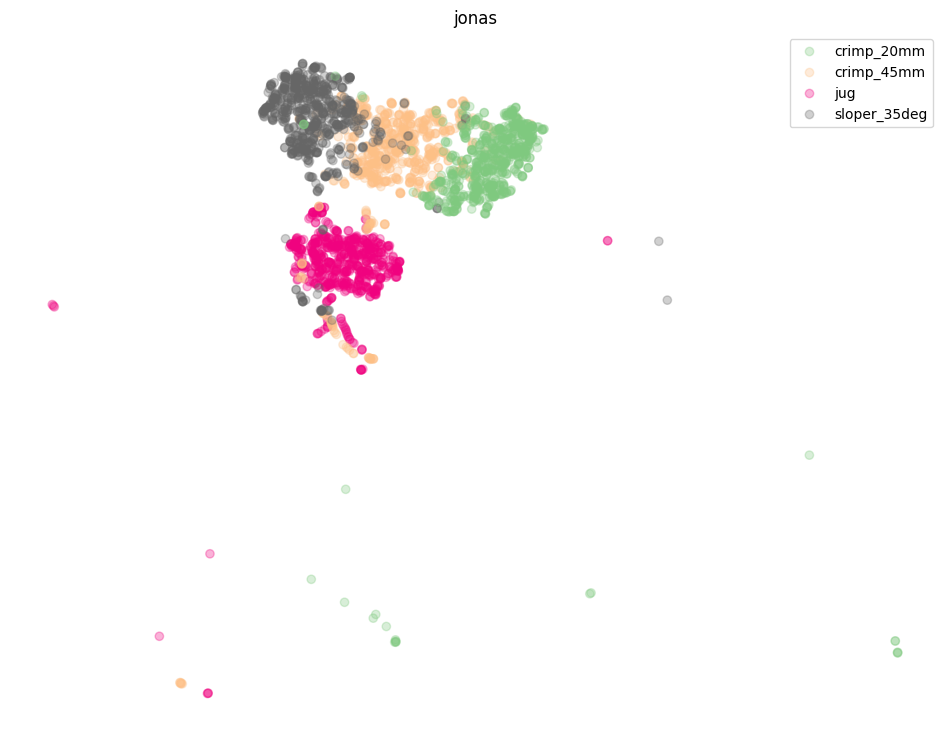

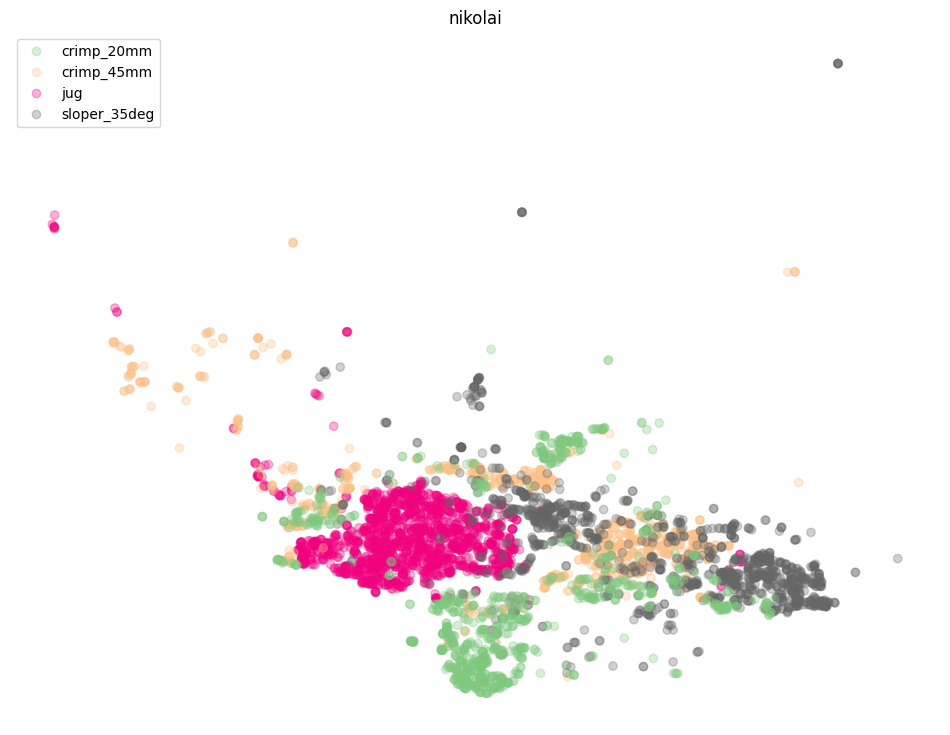

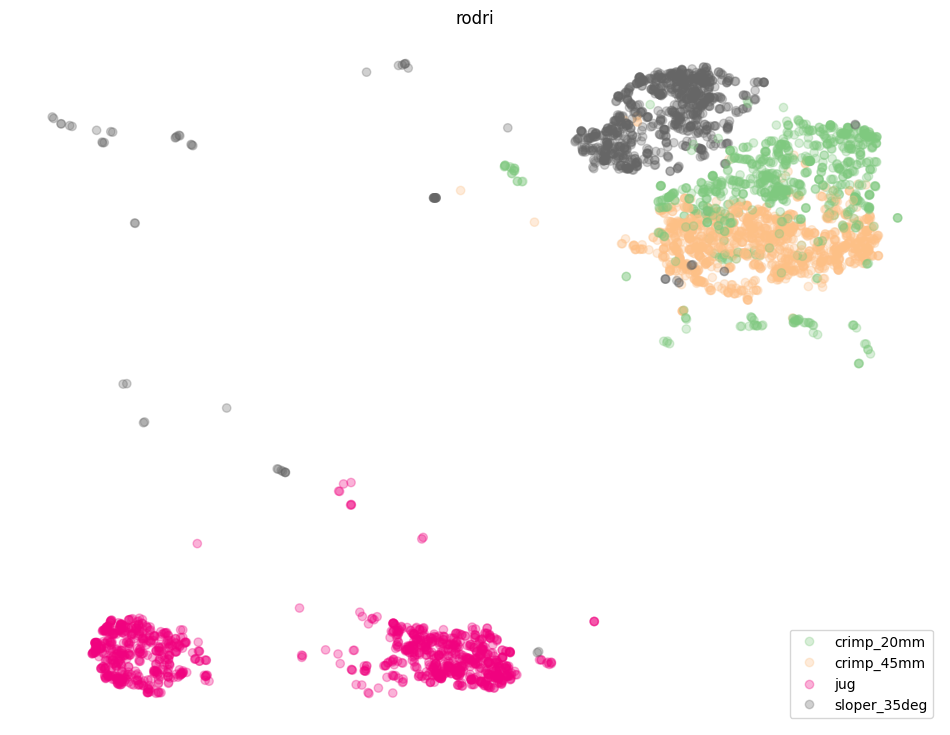

<Figure size 1200x900 with 0 Axes>

In [5]:
hold_labels = pd.Categorical(y.hold.replace('idle', np.NaN))
name_labels = pd.Categorical(y.name)

def _plot(condition, colors, title, save=False):
    plot = plt.scatter(
        X_tsne[condition,0], X_tsne[condition,1],
        c=colors.codes[condition],
        alpha=0.3, cmap='Accent')
    plt.legend(handles=plot.legend_elements()[0], labels=list(colors.categories))
    plt.title(title)
    plt.axis('off')
    if save:
        plt.savefig(f'{title}.png')
    else:
        plt.show()

for h in hold_labels.categories:
    _plot(y.hold == h, name_labels, h)
    plt.clf()
    
for n in name_labels.categories:
    _plot((y.name == n) & (~hold_labels.isna()), hold_labels, n)
    plt.clf()